### Main Project 1 script

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

np.random.seed(42)
random.seed(42)

In [2]:
# categories = ['comp.graphics', 'comp.os.ms-windows.misc',
#               'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
#               'rec.autos', 'rec.motorcycles',
#               'rec.sport.baseball', 'rec.sport.hockey']
# train_dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
# test_dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

#### Question 1

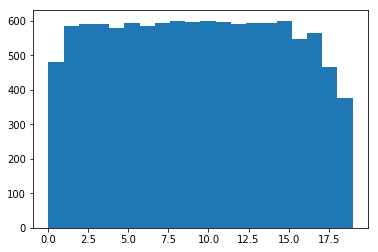

In [3]:
# Fetch all 20 news groups categories and plot a histogram of the training documents.

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
plt.hist(newsgroups_train.target, 20)
plt.show()

#### Question 2

In [4]:
########################################################################################################################
# Fetching 20NewsGroups dataset

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']

twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=categories, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                  # remove=['headers'],
                                  )
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Change labels into binary based on two well separated classes: Computer (labels 0-3) and Recreational (labels 4-7).
twenty_train_binary_labels = np.zeros(len(twenty_train.target))
for k in range(len(twenty_train.target)):
    if twenty_train.target[k] >= 4:
        twenty_train_binary_labels[k] = 1
twenty_test_binary_labels = np.zeros(len(twenty_test.target))
for k in range(len(twenty_test.target)):
    if twenty_test.target[k] >= 4:
        twenty_test_binary_labels[k] = 1
        
i = 51
print(twenty_train.filenames[i])
print(twenty_train.target[i])
print(twenty_train.target_names)

C:\Users\zharr\scikit_learn_data\20news_home\20news-bydate-train\comp.sys.mac.hardware\51613
3
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


In [7]:
########################################################################################################################
# Perform lemmatization on dataset

# The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'


# def lemmatize_sent(list_word, wnl):
#     # Text input is string, returns array of lowercased strings(words).
#     return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
#             for word, tag in pos_tag(list_word)]


wnl = nltk.wordnet.WordNetLemmatizer()
def lemmatize_training(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(nltk.word_tokenize(text))]


# TODO: should this filter out the following numbers too? "4-5" "c650"
def filter_numbers(text_array):
    # Filter out any numbers found in the array of strings
    output = []
    for s in text_array:
        if not s.isdigit():
            # if not a digit...
            try:
                # if a float, filter out
                float(s)
            except ValueError:
                # if not a float, add to output
                output.append(s)
        else:
            # if a digit, filter out
            pass
    return output


def array_to_string(text_array, delimeter=""):
    # Converts an array back into a string of words using the provided delimeter to add between each word
    output = ""
    for s in text_array:
        output = output + delimeter + s
    return output


def lemmatize_and_filter(documents):
    # Performs lemmatization, and number filtering on the given documents
    lemmatized_data = []
    for i in documents:
        # lemmatize the document:
        training_tagged = pos_tag(nltk.word_tokenize(i))
        lemmatized_array = lemmatize_training(i)

        # remove numbers from document:
        filtered_array = filter_numbers(lemmatized_array)

        # reassemble back to string:
        lemmatized_string = array_to_string(filtered_array, ' ')

        # add to final data list
        # print(lemmatized_string)
        lemmatized_data.append(lemmatized_string)

    return lemmatized_data


# print(lemmatized_data[0])
lemmatized_training = lemmatize_and_filter(twenty_train.data)
lemmatized_testing = lemmatize_and_filter(twenty_test.data)

In [8]:
########################################################################################################################
# Push lemmatized documents through CountVectorizer

# count_vect = CountVectorizer(min_df=3)
from sklearn.feature_extraction.text import CountVectorizer

# do for training
count_vect = CountVectorizer(min_df=3, stop_words='english')
X_lemmatized_train_counts = count_vect.fit_transform(lemmatized_training)

# do for testing
X_lemmatized_test_counts = count_vect.transform(lemmatized_testing)

In [9]:
########################################################################################################################
# Report shapes of TF-IDF matrices

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# do for training
X_lemmatized_train_tfidf = tfidf_transformer.fit_transform(X_lemmatized_train_counts)

print(X_lemmatized_train_tfidf.shape)
print('-' * 20)
print(X_lemmatized_train_counts.toarray()[:30, :5])
print('-' * 20)
print(X_lemmatized_train_tfidf.toarray()[:30, :5])

# do for testing
X_lemmatized_test_tfidf = tfidf_transformer.transform(X_lemmatized_test_counts)

print(X_lemmatized_test_tfidf.shape)
print('-' * 20)
print(X_lemmatized_test_counts.toarray()[:30, :5])
print('-' * 20)
print(X_lemmatized_test_tfidf.toarray()[:30, :5])

(4732, 17426)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3150, 17426

#### Question 3

In [10]:
# Perform LSI using the truncated SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
X_lsi_train_reduced = svd.fit_transform(X_lemmatized_train_tfidf)
Y_lsi_train_reduced = svd.components_
print(X_lsi_train_reduced.shape)
print(svd.components_.shape)

X_lsi_test_reduced = svd.transform(X_lemmatized_test_tfidf)
Y_lsi_test_reduced = svd.components_
print(X_lsi_train_reduced.shape)
print(svd.components_.shape)

(4732, 50)
(50, 17426)
(4732, 50)
(50, 17426)


In [11]:
# Perform NMF

from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=42)
W_nmf_train_reduced = model.fit_transform(X_lemmatized_train_tfidf)
H_nmf_train_reduced = model.components_

print(W_nmf_train_reduced.shape)
print(H_nmf_train_reduced.shape)

W_nmf_test_reduced = model.transform(X_lemmatized_test_tfidf)
H_nmf_test_reduced = model.components_

(4732, 50)
(50, 17426)


In [12]:
# Compare LSI and NMF

nmf_val = np.linalg.norm(X_lemmatized_train_tfidf - np.matmul(W_nmf_train_reduced, H_nmf_train_reduced), 'fro')**2
lsi_val = np.linalg.norm(X_lemmatized_train_tfidf - np.matmul(X_lsi_train_reduced, Y_lsi_train_reduced), 'fro')**2

print('NMF: ', nmf_val)
print('LSI: ', lsi_val)

NMF:  4156.105069008998
LSI:  4119.970801953944


#### Question 5

In [13]:
# Train an unregularized logistic regression classifier.

from sklearn.linear_model import LogisticRegression

# To be unregularized, we make the inverse of the regularization strength C 
# to be large to approximate an unregularized classifier.
clf = LogisticRegression(random_state=42, C=500, max_iter=100, solver='lbfgs').fit(X_lsi_train_reduced, twenty_train_binary_labels)

# score = clf.decision_function(X_lsi_test_reduced)
predicted = clf.predict(X_lsi_test_reduced)

In [14]:
# Find confusion matrix, accuracy, precision-recall, and F-1 scores

# Confusion matrix
from sklearn.metrics import confusion_matrix

print('Confusion matrix: \n', confusion_matrix(twenty_test_binary_labels, predicted))

# Accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(twenty_test_binary_labels, predicted))

# Average precision-recall score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# print('Average precision-recall score:', average_precision_score(twenty_test.target, predicted))
print('Precision score: ', precision_score(twenty_test_binary_labels, predicted))
print('Recall score: ', recall_score(twenty_test_binary_labels, predicted))

# F-1 score
from sklearn.metrics import f1_score

print('F-1 score:', f1_score(twenty_test_binary_labels, predicted))

Confusion matrix: 
 [[1508   52]
 [  35 1555]]
Accuracy:  0.9723809523809523
Precision score:  0.9676415681393902
Recall score:  0.9779874213836478
F-1 score: 0.9727869878010635


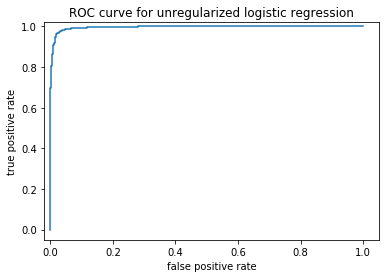

In [15]:
# ROC curve

from sklearn.metrics import roc_curve

score = clf.decision_function(X_lsi_test_reduced)
fpr, tpr, thresholds = roc_curve(twenty_test_binary_labels, score)

plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC curve for unregularized logistic regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(left=-0.02)
plt.ylim(top=1.02)
plt.show()

Optimal regularization strength for L1 Regulation:  [0.1]
Accuracy with L1 Regulation for L1 Regulation:  0.973015873015873
Average precision-recall score for L1 Regulation: 0.957519138728885
Precision score for L1 Regulation:  0.9665220086794792
Recall score for L1 Regulation:  0.980503144654088
F-1 score for L1 Regulation: 0.9734623790196691


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1917: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


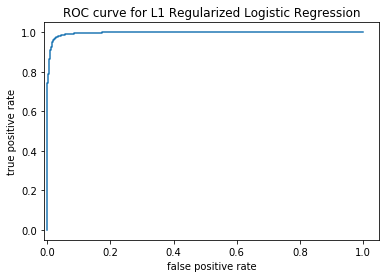


Optimal regularization strength for L2 regulation:  [0.01]
Accuracy with L2 Regulation:  0.9733333333333334
Average precision-recall score for L2 Regulation: 0.9581070282257136
Precision score for L2 Regulation:  0.96712158808933
Recall score for L2 Regulation:  0.980503144654088
F-1 score for L2 Regulation: 0.9737663960024984


C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\linear_model\logistic.py:1917: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


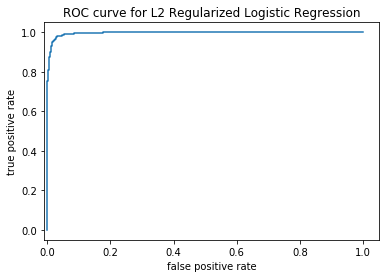

In [16]:
from sklearn.linear_model import LogisticRegressionCV

# Define training and testing data sets
X_train = X_lsi_train_reduced
y_train = twenty_train_binary_labels

X_test = X_lsi_test_reduced
y_test = twenty_test_binary_labels

# Define regularization strength values here
REG_STRENGTH_OPTIONS = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Determine regulation strength for L1 regulation
clf_L1 = LogisticRegressionCV(random_state=42, Cs=REG_STRENGTH_OPTIONS, cv=5, penalty='l1', scoring='accuracy', solver = 'liblinear').fit(X_train, y_train)
l1_reg_strength = 1/clf_L1.C_ # Regulization strength is inverse of optimal Cs
predicted_L1 = clf_L1.predict(X_test)

# Display L1 Stats
print('Optimal regularization strength for L1 Regulation: ', l1_reg_strength)
print('Accuracy with L1 Regulation for L1 Regulation: ', clf_L1.score(X_test, y_test))
print('Average precision-recall score for L1 Regulation:', average_precision_score(y_test, predicted_L1))
print('Precision score for L1 Regulation: ', precision_score(y_test, predicted_L1))
print('Recall score for L1 Regulation: ', recall_score(y_test, predicted_L1))
print('F-1 score for L1 Regulation:', f1_score(y_test, predicted_L1))

# L1 ROC Curve
score_L1 = clf_L1.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, score_L1)

plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC curve for L1 Regularized Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(left=-0.01)
plt.show()

# Determine regulation strength for L2 regulation
clf_L2 = LogisticRegressionCV(random_state=42, Cs=REG_STRENGTH_OPTIONS, cv=5, penalty='l2', scoring='accuracy', solver = 'liblinear').fit(X_train, y_train)
L2_reg_strength = 1/clf_L2.C_ # Regulization strength is inverse of optimal Cs
predicted_L2 = clf_L2.predict(X_test)

# Display L2 Stats
print('\nOptimal regularization strength for L2 regulation: ', L2_reg_strength)
print('Accuracy with L2 Regulation: ', clf_L2.score(X_test, y_test))
print('Average precision-recall score for L2 Regulation:', average_precision_score(y_test, predicted_L2))
print('Precision score for L2 Regulation: ', precision_score(y_test, predicted_L2))
print('Recall score for L2 Regulation: ', recall_score(y_test, predicted_L2))
print('F-1 score for L2 Regulation:', f1_score(y_test, predicted_L2))

# L2 ROC Curve
score_L2 = clf_L2.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, score_L2)

plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC curve for L2 Regularized Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(left=-0.01)
plt.show()

#### Question 6

In [17]:
########################################################################################################################
# Train a Naive Bayes Gaussian classifier on the reduced TFIDF training set from problem 3

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# clf = GaussianNB().fit(W_nmf_train_reduced, twenty_train.target)
# clf2 = MultinomialNB().fit(W_nmf_train_reduced, twenty_train.target)
clf = GaussianNB().fit(W_nmf_train_reduced, twenty_train_binary_labels)
clf2 = MultinomialNB().fit(W_nmf_train_reduced, twenty_train_binary_labels)

In [18]:
########################################################################################################################
# Generate predictions for test set

predicted = clf.predict(W_nmf_test_reduced)
correct = 0
for i, category in enumerate(predicted):
    if category == twenty_test_binary_labels[i]:
        correct += 1
#     if i < 5:
#         print('{} =? {}'.format(twenty_test.target_names[category], twenty_test.target_names[twenty_test.target[i]]))
#     elif i == 5:
#         print('...\n')
print('Accuracy of NB Gaussian: {}'.format(correct / W_nmf_test_reduced.shape[0]))

Accuracy of NB Gaussian: 0.9374603174603174


In [19]:
########################################################################################################################
# Generate predictions for test set

predicted = clf2.predict(W_nmf_test_reduced)
correct = 0
for i, category in enumerate(predicted):
    if category == twenty_test_binary_labels[i]:
        correct += 1
#     if i < 5:
#         print('{} =? {}'.format(twenty_test.target_names[category], twenty_test.target_names[twenty_test.target[i]]))
#     elif i == 5:
#         print('...\n')
print('Accuracy of NB Gaussian: {}'.format(correct / W_nmf_test_reduced.shape[0]))

Accuracy of NB Gaussian: 0.94


#### Question 7

In [5]:
########################################################################################################################
## Custom Transformers for Grid Search

from sklearn.datasets import fetch_20newsgroups
from sklearn.base import BaseEstimator, TransformerMixin
import re
# The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')


class Importer(BaseEstimator, TransformerMixin):

    def __init__(self, remove=None):
        self.remove = remove

    def transform(self, raw_documents, *_):
        if self.remove is not None:
            if 'headers' in self.remove:
                raw_documents = [self.strip_newsgroup_header(text) for text in raw_documents]
            if 'footers' in self.remove:
                raw_documents = [self.strip_newsgroup_footer(text) for text in raw_documents]

        return raw_documents

    def fit(self, *_):
        return self

    ## Taken from twenty_newsgroups.py
    @staticmethod
    def strip_newsgroup_header(text):
        """
        Given text in "news" format, strip the headers, by removing everything
        before the first blank line.

        Parameters
        ----------
        text : string
            The text from which to remove the signature block.
        """
        _before, _blankline, after = text.partition('\n\n')
        return after

    _QUOTE_RE = re.compile(r'(writes in|writes:|wrote:|says:|said:'
                           r'|^In article|^Quoted from|^\||^>)')

    ## Taken from twenty_newsgroups.py
    @staticmethod
    def strip_newsgroup_footer(text):
        """
        Given text in "news" format, attempt to remove a signature block.

        As a rough heuristic, we assume that signatures are set apart by either
        a blank line or a line made of hyphens, and that it is the last such line
        in the file (disregarding blank lines at the end).

        Parameters
        ----------
        text : string
            The text from which to remove the signature block.
        """
        lines = text.strip().split('\n')
        for line_num in range(len(lines) - 1, -1, -1):
            line = lines[line_num]
            if line.strip().strip('-') == '':
                break

        if line_num > 0:
            return '\n'.join(lines[:line_num])
        else:
            return text


class Lemmatizer(BaseEstimator, TransformerMixin):

    def __init__(self, enabled=True):
        self.enabled = enabled
        self.wnl = nltk.wordnet.WordNetLemmatizer()

    def transform(self, raw_documents, *_):
        if self.enabled:
            return self._lemmatize_and_filter(raw_documents)
        else:
            return raw_documents

    def fit(self, *_):
        return self

    ##################################################################
    # supporting functions:
    def _penn2morphy(self, penntag):
        """ Converts Penn Treebank tags to WordNet. """
        morphy_tag = {'NN': 'n', 'JJ': 'a',
                      'VB': 'v', 'RB': 'r'}
        try:
            return morphy_tag[penntag[:2]]
        except:
            return 'n'

    # def lemmatize_sent(list_word, wnl):
    #     # Text input is string, returns array of lowercased strings(words).
    #     return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
    #             for word, tag in pos_tag(list_word)]

    def _lemmatize_training(self, text):
        # Text input is string, returns array of lowercased strings(words).
        return [self.wnl.lemmatize(word.lower(), pos=self._penn2morphy(tag))
                for word, tag in pos_tag(nltk.word_tokenize(text))]

    def _filter_numbers(self, text_array):
        # Filter out any numbers found in the array of strings
        output = []
        for s in text_array:
            if not s.isdigit():
                # if not a digit...
                try:
                    # if a float, filter out
                    float(s)
                except ValueError:
                    # if not a float, add to output
                    output.append(s)
            else:
                # if a digit, filter out
                pass
        return output

    def _array_to_string(self, text_array, delimeter=""):
        # Converts an array back into a string of words using the provided delimeter to add between each word
        output = ""
        for s in text_array:
            output = output + delimeter + s
        return output

    def _lemmatize_and_filter(self, documents):
        # Performs lemmatization, and number filtering on the given documents
        lemmatized_data = []
        for i in documents:
            # lemmatize the document:
            training_tagged = pos_tag(nltk.word_tokenize(i))
            lemmatized_array = self._lemmatize_training(i)

            # remove numbers from document:
            filtered_array = self._filter_numbers(lemmatized_array)

            # reassemble back to string:
            lemmatized_string = self._array_to_string(filtered_array, ' ')

            # add to final data list
            # print(lemmatized_string)
            lemmatized_data.append(lemmatized_string)

        return lemmatized_data

In [6]:
# ########################################################################################################################
# # Change labels into binary based on two well separated classes: Computer (labels 0-3) and Recreational (labels 4-7).
# twenty_train_binary_labels = np.zeros(len(twenty_train.target))
# for k in range(len(twenty_train.target)):
#     if twenty_train.target[k] >= 4:
#         twenty_train_binary_labels[k] = 1
# twenty_test_binary_labels = np.zeros(len(twenty_test.target))
# for k in range(len(twenty_test.target)):
#     if twenty_test.target[k] >= 4:
#         twenty_test_binary_labels[k] = 1

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('import', Importer(remove=None)),
    ('lemm', Lemmatizer(enabled=True)),
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)

N_FEATURES_OPTIONS = [10, 50]
C_OPTIONS = [0.1, 1, 10]

param_grid = [
    {
        'import__remove': [None, ['headers', 'footers']],
        'lemm__enabled': [False, True],
        'vect__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LinearSVC()],
        'clf__C': C_OPTIONS
    }
]

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(twenty_train.data, twenty_train_binary_labels)
rmtree(cachedir)

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\zharr\\AppData\\Local\\Temp\\tmpga4_4s23'", use "location='C:\\Users\\zharr\\AppData\\Local\\Temp\\tmpga4_4s23'" instead.


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Importer(remove=None), [ 'From: rschmitt@shearson.com (Robert Schmitt)\n'
  'Subject: Re: Please Recommend 3D Graphics Library F\n'
  'Reply-To: rschmitt@shearson.com\n'
  'Organization: Lehman Brothers, Inc.\n'
  'Lines: 9\n'
  '\n'
  'What hardware do plan to run on?  Workstation or PC?  Cost level?\n'
  'Run-time licensing needs?\n'
  '\n'
  'Bob\n'
  '------------------------------------------------------------------\n'
  'Robert A. Schmitt | Applied Derivatives Technology | Lehman Brothers\n'
  'rschmitt@shearson.com\n'
  '\n'
  '\n',
  'From: mori@volga.mfd.cs.fujitsu.co.jp (Tsuyoshi Mori)\n'
  'Subject: I want use DeskJet on System7\n'
  'Organization: FUJITSU.Ltd., Kawasaki, Japan.\n'
  'Lines: 15\n'
  'Di..., 
array([0., ..., 0.]), None)
________________________________________________fit_transform_one - 0.7s, 0.0min
______

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 12.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 4.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x68241 sparse matrix of type '<class 'numpy.int64'>'
	with 388188 stored elements in Compressed Sparse Row format>, 
array([0., ..., 0.]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0), 
<3785x68241 sparse matrix of type '<class 'numpy.float64'>'
	with 388188 stored elements in Compressed Sparse Row format>, 
array([0., ..., 0.]), None)
___________________________________________

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 12.39s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 4.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x67397 sparse matrix of type '<class 'numpy.int64'>'
	with 383315 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0), 
<3785x67397 sparse matrix of type '<class 'numpy.float64'>'
	with 383315 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
___________________________________________

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 11.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 4.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x67706 sparse matrix of type '<class 'numpy.int64'>'
	with 387422 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0), 
<3785x67706 sparse matrix of type '<class 'numpy.float64'>'
	with 387422 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
___________________________________________

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 12.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 4.8s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x70543 sparse matrix of type '<class 'numpy.int64'>'
	with 389512 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0), 
<3786x70543 sparse matrix of type '<class 'numpy.float64'>'
	with 389512 stored elements in Compressed Sparse Row format>, 
array([1., ..., 0.]), None)
___________________________________________

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 12.36s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 4.8s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x70287 sparse matrix of type '<class 'numpy.int64'>'
	with 390287 stored elements in Compressed Sparse Row format>, 
array([1., ..., 1.]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0), 
<3787x70287 sparse matrix of type '<class 'numpy.float64'>'
	with 390287 stored elements in Compressed Sparse Row format>, 
array([1., ..., 1.]), None)
___________________________________________

________________________________________________fit_transform_one - 1.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\zharr\AppData\Local\Temp\tmpga4_4s23\joblib\sklearn\pipeline\_fit_transform_one\bc64d833e6b3db3c1a80e7ac2b1000e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\zharr\AppData\Local\Temp\tmpga4_4s23\joblib\sklearn\pipeline\_fit_transform_one\82140bd2f442b4c2760965176386c41c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\zharr\AppData\Local\Temp\tmpga4_4s23\joblib\sklearn\pipeline\_fit_transform_one\6010b150af790472a9d8cabbab28259c
___________________________________fit_transform_one cache loaded - 1.1s, 0.0min
[Memory]1.4s, 0.0min    : Loading _fit_transform_one from C:\Users\zharr\AppData\Local\Temp\tmpga4_4s23\joblib\sklearn\pipeline\_fit_tra

KeyboardInterrupt: 

In [3]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\zharr\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       19.487636         0.238821         0.962595          0.961486   
1        2.967219         0.264457         0.970414          0.972316   
2        5.021458         0.268467         0.940194          0.940564   
3       51.245995         0.480431         0.931741          0.927833   
4       16.682118         0.198526         0.935757          0.936708   
5        2.623997         0.216139         0.952663          0.957048   
6        3.320409         0.217080         0.934277          0.932800   
7       37.950579         0.375455         0.935123          0.932745   
8        1.468076         0.249059         0.965554          0.963810   
9        1.485586         0.264089         0.971893          0.975697   
10       1.468438         0.268312         0.955199          0.950814   
11       1.490639         0.476573         0.949493          0.946429   
12       1.267450         0.204444         0.949281          0.952716   
13       1.294739         0.240825         0.967244          0.970889   
14       1.271338         0.219448         0.940828          0.939825   
15       1.289022         0.370687         0.948859          0.947802   
16       1.468181         0.244173         0.966822          0.965395   
17       1.521880         0.261826         0.972950          0.978075   
18       1.476721         0.264500         0.959848          0.958686   
19       1.516557         0.470850         0.961961          0.960059   
20       1.267040         0.204160         0.960693          0.961275   
21       1.327578         0.241073         0.971682          0.976173   
22       1.288924         0.216852         0.948648          0.948595   
23       1.327435         0.373320         0.962806          0.961644   

                                            param_clf param_clf__C  \
0   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
1   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
2   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
3   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
4   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
5   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
6   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
7   LinearSVC(C=10, class_weight=None, dual=True, ...          0.1   
8   LinearSVC(C=10, class_weight=None, dual=True, ...            1   
9   LinearSVC(C=10, class_weight=None, dual=True, ...            1   
10  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
11  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
12  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
13  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
14  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
15  LinearSVC(C=10, class_weight=None, dual=True, ...            1   
16  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
17  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
18  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
19  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
20  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
21  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
22  LinearSVC(C=10, class_weight=None, dual=True, ...           10   
23  LinearSVC(C=10, class_weight=None, dual=True, ...           10   

   param_import__remove param_lemm__enabled  \
0                  None               False   
1                  None               False   
2                  None               False   
3                  None               False   
4    [headers, footers]               False   
5    [headers, footers]               False   
6    [headers, footers]               False   
7    [headers, footers]               False   
8   